# Analysis of CrowdFlower jobs #767273 and #767262: sentence and abstract tasks for BioCreative official evaluation

Tong Shu Li<br>
Created on Tuesday 2015-11-12<br>
Last updated 2015-11-13

We take a look at the worker profiles for the two final tasks for the BioCreative evaluation.

In [1]:
import os
import pandas as pd
import pycountry
import sys

In [2]:
sys.path.append("..")

In [3]:
%matplotlib inline

---

### Read the results:

In [4]:
loc = os.path.join("..", "data", "crowdflower", "results")
fname = "job_767262_worker_summary.csv"
sent_workers = pd.read_csv(os.path.join(loc, fname), sep = ',')

fname = "job_767273_worker_summary.csv"
abs_workers = pd.read_csv(os.path.join(loc, fname), sep = ',')

In [5]:
# add a column that tells us if a worker was flagged
sent_workers["flagged"] = sent_workers["flagged_at"].map(lambda x: isinstance(x, str))

abs_workers["flagged"] = abs_workers["flagged_at"].map(lambda x: isinstance(x, str))

In [6]:
sent_workers.shape

(356, 19)

In [7]:
abs_workers.shape

(769, 19)

### Remove bad workers

In [8]:
# had good trust score but was kicked out due to weird answer distribution
good_sent = sent_workers.query("judgments_count > 6 and trust_overall >= 0.7 and ~flagged")

good_abs = abs_workers.query("judgments_count > 6 and trust_overall >= 0.7 and ~flagged")

In [9]:
good_sent.shape

(90, 19)

In [10]:
good_abs.shape

(224, 19)

In [11]:
good_sent.head()

,worker_id,external_id,judgments_count,missed_count,golds_count,forgiven_count,channel,country,region,city,last_ip,flagged_at,rejected_at,bonus,flag_reason,trust_overall,submission_rate,level_2_contributors,flagged
1,4688131,DanicaWong,366,2,66,0,zoombucks,CAN,BC,Vancouver,75.157.35.92,NaN,NaN,0,NaN,0.9697,439,1,False
6,7281828,4059599,246,5,46,0,clixsense,PHL,D9,Mandaluyong City,121.54.32.144,NaN,NaN,0,NaN,0.8913,369,1,False
8,9509334,2691342,96,4,21,0,clixsense,BIH,01,Sarajevo,188.127.125.187,NaN,NaN,0,NaN,0.8095,360,1,False
11,11034490,A49649E23956D3B82BFA95FAD8D0CB36,30,1,10,0,neodev,PHL,D9,NaN,180.191.114.106,NaN,NaN,0,NaN,0.9000,360,1,False
12,11064916,F3412D40364B0E6F2BFA95FAD8D0CB36,636,17,111,0,neodev,BOL,04,La Paz,190.129.184.198,NaN,NaN,0,NaN,0.8468,250,1,False


In [12]:
good_abs.head()

,worker_id,external_id,judgments_count,missed_count,golds_count,forgiven_count,channel,country,region,city,last_ip,flagged_at,rejected_at,bonus,flag_reason,trust_overall,submission_rate,level_2_contributors,flagged
1,2112439,3098740,18,1,8,0,prodege,USA,OK,Norman,162.228.151.72,NaN,NaN,0,NaN,0.8750,360,1,False
3,3626598,94399,30,1,10,0,prodege,CAN,ON,Sault Sainte Marie,70.51.131.135,NaN,NaN,0,NaN,0.9000,360,1,False
8,6333422,3274588,60,1,15,0,clixsense,PHL,B2,Cagayan De Oro,49.147.185.131,NaN,NaN,0,NaN,0.9333,360,1,False
12,6347548,3525054,30,2,10,0,clixsense,IND,28,Kolkata,116.202.201.75,NaN,NaN,0,NaN,0.8000,360,1,False
20,6591664,3801006,48,1,13,0,clixsense,MEX,09,Mexico,189.178.215.37,NaN,NaN,0,NaN,0.9231,360,1,False


## Statistics

In [13]:
good_sent["judgments_count"].median()

120.0

In [14]:
good_sent["judgments_count"].std()

232.66333046554811

In [15]:
good_abs["judgments_count"].median()

48.0

In [16]:
good_abs["judgments_count"].std()

80.915390677117131

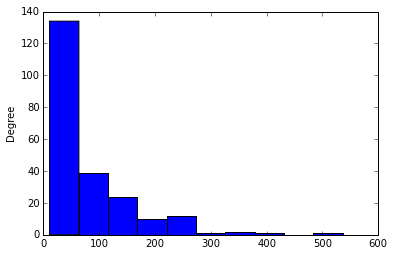

In [17]:
good_abs["judgments_count"].plot(kind = "hist")

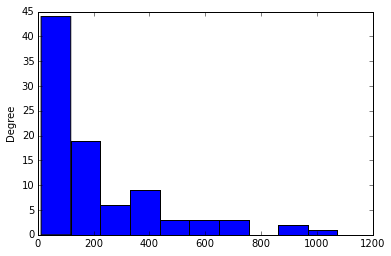

In [18]:
good_sent["judgments_count"].plot(kind = "hist")

---

In [19]:
def get_country_name(code):
    if isinstance(code, str):
        return pycountry.countries.get(alpha3 = code).name.split(",")[0]
    
    # code is missing (NaN)
    return "unknown"

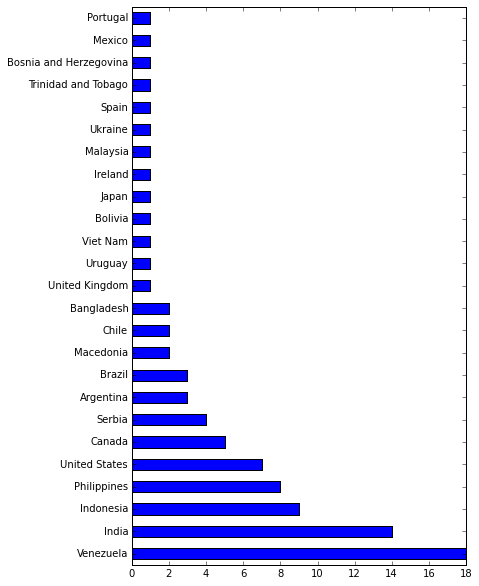

In [20]:
good_sent["country"].map(get_country_name).value_counts().plot(kind = "barh", figsize = (6, 10))

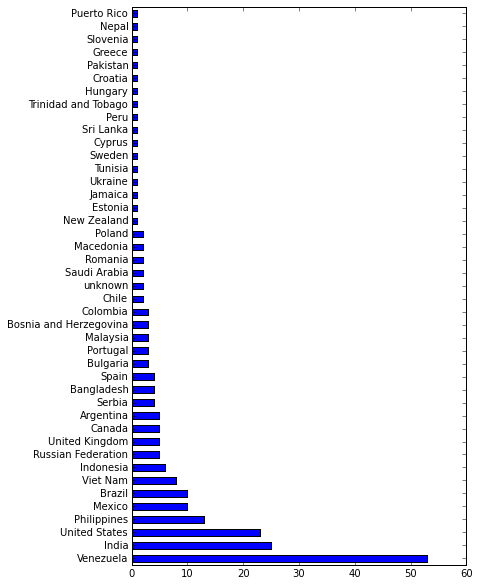

In [21]:
good_abs["country"].map(get_country_name).value_counts().plot(kind = "barh", figsize = (6, 10))

In [22]:
len(good_sent["country"].unique())

25

In [23]:
len(good_abs["country"].unique())

43

In [24]:
len(
    set(good_sent["worker_id"]) & set(good_abs["worker_id"])
)

33